# 2025-07-11-금 관광통계 / 발간보고서
1975년부터 2024년까지 연도별 통계 자료 입니다.
* 방한 외래관광객, 국민 해외관광객, 관광수입, 관광지출, 관광수지
* 2024년 관광수입, 관광지출, 관광수지는 잠정치

# 목표
1시트인 '방한 외래관광객'에서 매년 월별 관광객이 추이를 확인해보자

In [83]:
# 필요 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

In [2]:
# 애플 맥 폰트
plt.rcParams['font.family'] = 'AppleGothic'

# 유니코드 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 데이터 불러오기
file_path = '/Users/yoominsang/study/Download/Data/Yearly_Tourism_Statistics_1975_2024.xlsx'

In [33]:
# xlsc 파일
df = pd.read_excel(file_path, sheet_name='방한 외래관광객', header=[3,4], engine='openpyxl')

In [34]:
# 데이터 추출
monthly_data = df.iloc[6:, [0] + list(range(3, 15))].copy()

In [35]:
# 컬럼명 설정
monthly_data.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [37]:
df.columns = [f"{a}_{b}" if 'Unnamed' not in a else b for a, b in df.columns]

print(df.head())

   연  도         계        성장률     1월     2월     3월     4월     5월     6월     7월  \
0  Year  Total(명)  Change(%)   Jan.   Feb.   Mar.   Apr.    May   Jun.   Jul.   
1  1975    632846       22.3  35494  37979  48733  50090  54741  56824  54439   
2  1976    834239  31.823382  53132  54190  67721  72636  75719  70727  69515   
3  1977    949666  13.836203  63052  66138  78442  88615  83151  78977  72650   
4  1978   1079396  13.660592  71812  74218  88620  93260  97457  93537  84141   

      8월      9월     10월    11월    12월  
0   Aug.    Sep.    Oct.   Nov.   Dec.  
1  60901   62188   68959  61335  41163  
2  78207   77460   90774  74705  49453  
3  85528   89828   99762  84919  58604  
4  95242  103099  115515  95860  66635  


In [38]:
# 데이터 확인 => 행기준 결측치 제거
print(df.shape)
print(df.head(55).dropna())

(51, 15)
    연  도         계         성장률       1월       2월       3월       4월       5월  \
0   Year  Total(명)   Change(%)     Jan.     Feb.     Mar.     Apr.      May   
1   1975    632846        22.3    35494    37979    48733    50090    54741   
2   1976    834239   31.823382    53132    54190    67721    72636    75719   
3   1977    949666   13.836203    63052    66138    78442    88615    83151   
4   1978   1079396   13.660592    71812    74218    88620    93260    97457   
5   1979   1126100    4.326864    81236    81422    94674   103420   107847   
6   1980    976415  -13.292336    71641    76744    83315    99721    95429   
7   1981   1093214   11.962024    67745    68478    85521   105884   110425   
8   1982   1145044    4.741066    82355    71581    99026   106283   106818   
9   1983   1194551    4.323589    76069    82116    94332   110266   112060   
10  1984   1297318    8.602981    81449    82345    99650   123899   117099   
11  1985   1426045    9.922548    87607    

In [74]:
# 필요없는 데이터 삭제
col_drop = df.columns[1:3]
state_data = df.drop(columns=col_drop).iloc[40:51]
# 열이름 공백제거
state_data.columns = state_data.columns.str.strip()

print(state_data)

    연  도       1월       2월       3월       4월       5월       6월       7월  \
40  2014   842671   886026  1132155  1251374  1239606  1273627  1354753   
41  2015   917054  1050706  1238144  1384567  1334212   750925   629737   
42  2016  1077431  1126250  1389399  1469674  1492680  1554413  1703495   
43  2017  1220695  1252080  1233640  1075899   977889   991802  1008671   
44  2018   956036  1045415  1366100  1331709  1238021  1282093  1254833   
45  2019  1104803  1201802  1535641  1635066  1485684  1476218  1448067   
46  2020  1272708   685212    83497    29415    30806    36938    61012   
47  2021    58397    65582    74604    70112    74463    77029    83005   
48  2022    81851    99999    96768   127919   175922   227713   263986   
49  2023   434429   479248   800575   888776   867130   960638  1032188   
50  2024   880881  1030244  1491748  1462797  1418463  1417274  1408499   

         8월       9월      10월      11월      12월  
40  1454078  1245777  1317482  1117398  1086569  

In [75]:
# 월 열만 추출
month_cols = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 
              'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']

# 월 순서 이름으로 변경
month_names = ['1월', '2월', '3월', '4월', '5월', '6월',
               '7월', '8월', '9월', '10월', '11월', '12월']

print(month_cols)
print(month_names)
print(state_data.columns.tolist())

['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
['연  도', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']


In [76]:
# '연  도' 열 문자열화
state_data['연  도'] = state_data['연  도'].astype(str)

# '연  도' 제외한 월 컬럼 자동 추출
month_cols = [col for col in state_data.columns if col != '연  도']

# 월 이름 (Jan. → 1월 등)
month_names = [col.replace('.', '').strip() for col in month_cols]

# 모든 월별 열을 정수형으로 강제 변환 (선택적)
df[month_cols] = df[month_cols].apply(pd.to_numeric, errors='coerce').astype('Int64')

print(month_cols)
print(month_names)

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']


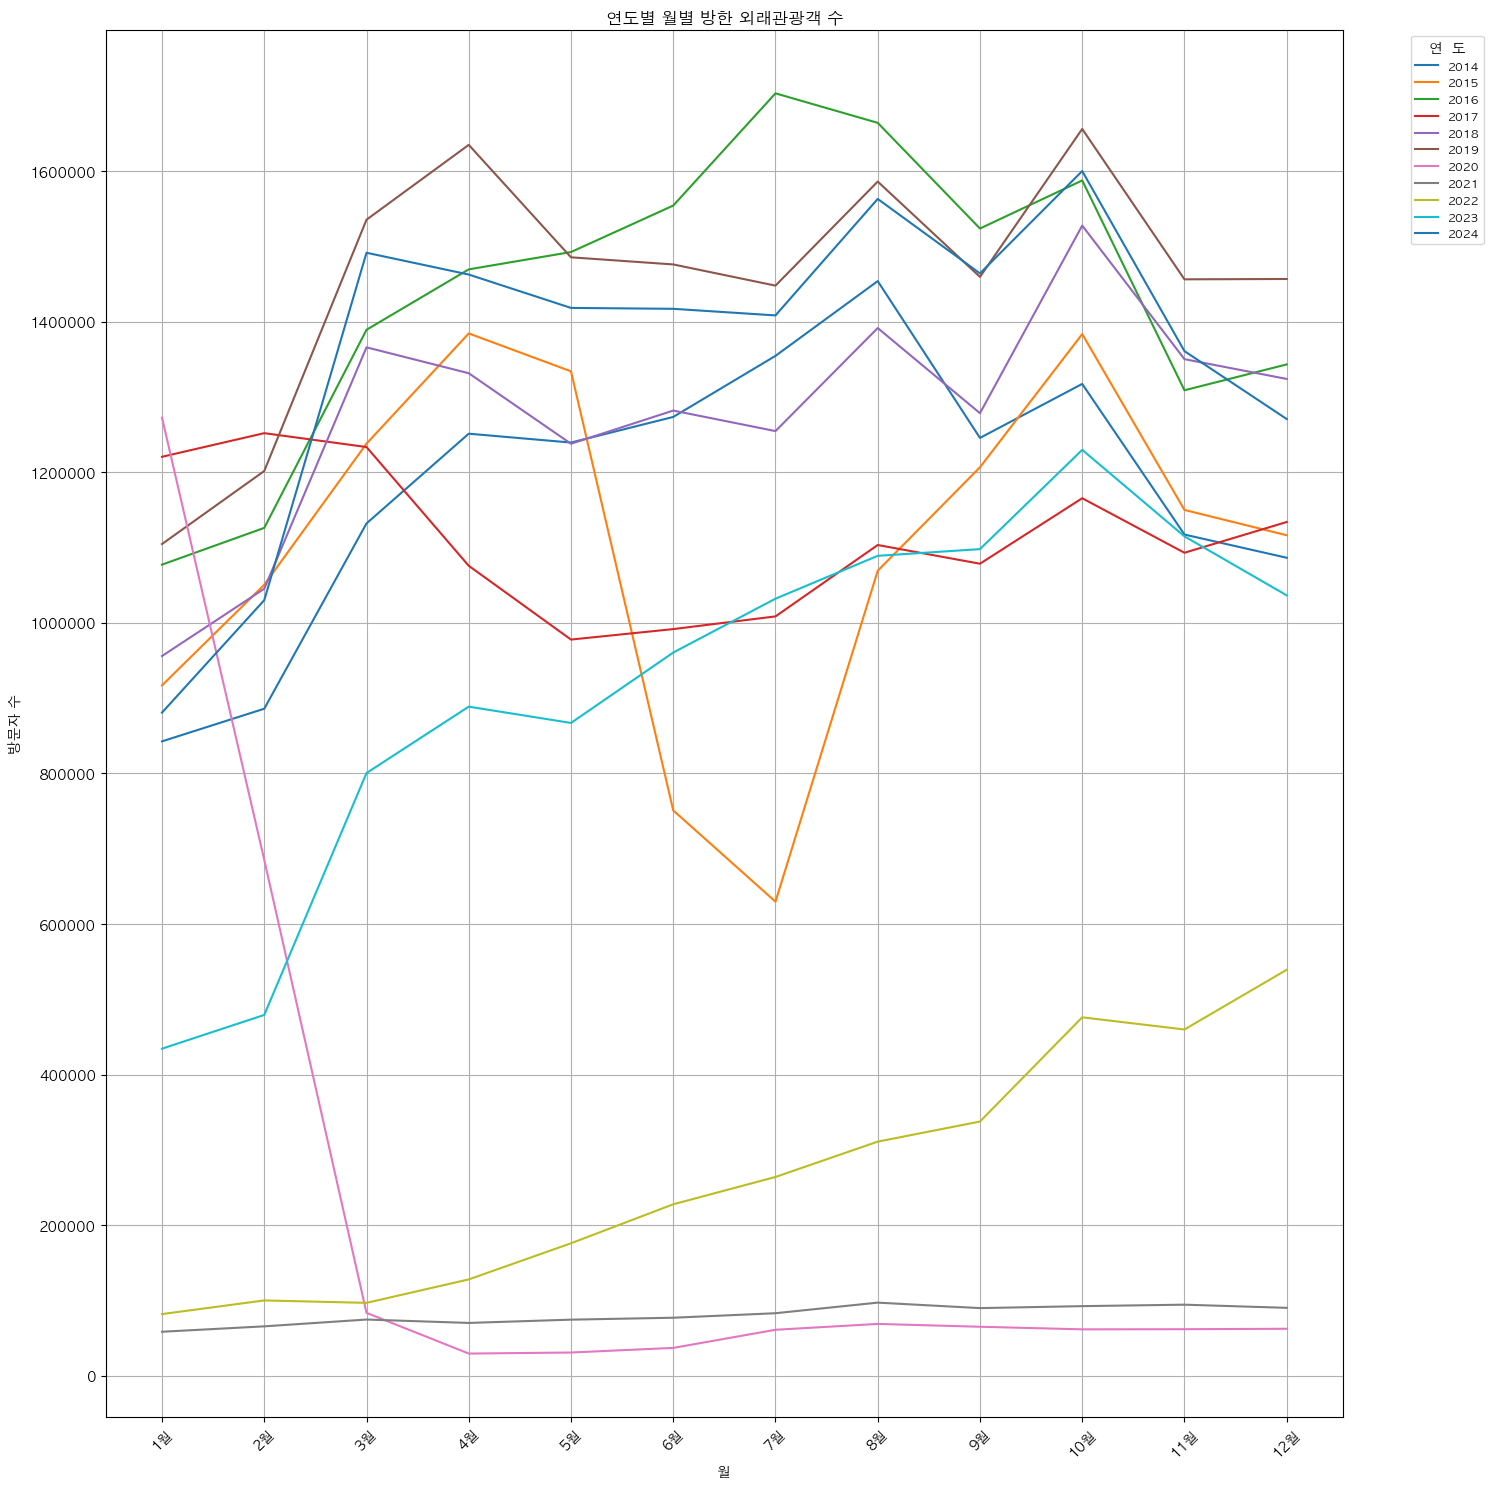

In [82]:
# 그래프 그리기
plt.figure(figsize=(15, 15))

for i, row in state_data.iterrows():
    plt.plot(month_names, row[month_cols], label=row['연  도'])

plt.title('연도별 월별 방한 외래관광객 수')
plt.xlabel('월')
plt.ylabel('방문자 수')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')
plt.legend(title='연  도', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.grid(True)
plt.show()

# 결과
코로나 펜데믹이 있던 2020년도부터 2022년도는 방한객이 많이 줄어 해당 데이터는 감안하고, 확인하였습니다. 
2023년도부터 방한객이 회복세를 보였으며, 대체적으로 11월부터 방한객이 줄다가 1월부터 차츰 증가하는 추세를 보여줍니다. 

# 부족한 사항
그래프의 추이를 확인하여 보다 다양한 데이터(그래프를 비교하여 평균 몇월이 관광객이 많은지 등)을 확인할 수 있으면 좋겠다.